In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt 

In [2]:
def f(h):
    return h**3 - 10*h + 5*math.exp(-h/2) - 2

In [3]:
x=np.linspace(-20,100,500)
y = [f(i) if i > 0 else np.nan for i in x]


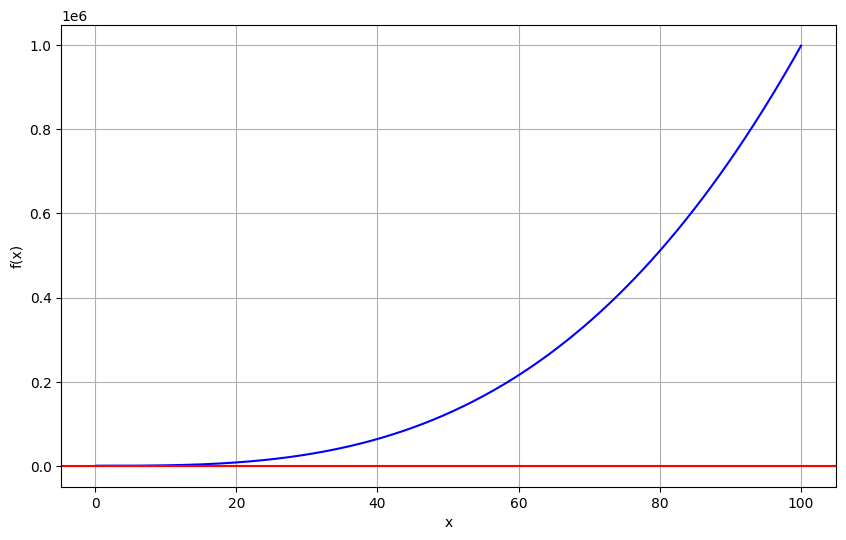

In [4]:
plt.figure(figsize=(10,6))
plt.plot(x,y,color='blue')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.axhline(y=0,color='red')
plt.grid(True)
plt.show()

In [5]:
def value(xl,xu):
    yl=f(xl)
    yu=f(xu)
    y=((xl*yu)-(xu*yl))/(yu-yl)
    return y

In [6]:
def error(xr,xr_old):
    ea=abs((xr-xr_old)/xr)*100 if xr!=0 else 0
    return ea

In [7]:
def false_position_method(xl,xu,es_threshold=0.05,max_iterations=100,verbose=True):
    
    if f(xl)*f(xu)>=0:
        raise ValueError("f(xl) and f(xu) must have opposite signs")
    if(f(xl)>0):
        tem=xl
        xl=xu
        xu=tem
    iteration=0
    results=[]
    xr_old=0
    converged=False
    
    if verbose:
        print("="*80)
        print(f"{'Iter':<5} {'xu':<15} {'xr (root)':<15} {'f(xr)':<15} {'εa (%)':<12}")
        print("="*80)
    while iteration<max_iterations:
        iteration+=1
        xr=value(xl,xu)
        f_xr=f(xr)
        if iteration>1:
            ea=error(xr,xr_old)
        else:
            ea=float('inf')
        results.append({
            'Iteration':iteration,
            'xl':xl,
            'xu':xu,
            'xr':xr,
            'f(xr)':f_xr,
            'ea(%)':ea if ea != float('inf') else None,
        })
        if verbose:
            ea_str=f"{ea:.8f}" if ea!=float('inf') else "N/A"
            print(f"{iteration:<5} {xl:<15.10f} {xu:<15.10f} {xr:<15.10f} {f_xr:<15.10f} {ea_str:<12}")
        if iteration>1 and ea<es_threshold:
            converged=True
            if verbose:
                print("="*80)
                print(f"CONVERGENCE ACHIEVED!")
                print(f"Approximate relative error = {ea:.10f}% < {es_threshold}%")
                break
        if f_xr<0:
            xl=xr
        elif(f_xr>0):
            xu=xr
        else:
            return results, xr
        xr_old=xr
        
    if not converged and verbose:
        print(f"Maximum iterations ({max_iterations}) reached without convergence")
    
    return results, xr
            
        

In [8]:
xl=0.1
xu=0.4
thresh=0.001
results,final=false_position_method(xl,xu,thresh)
print(f"\nFINAL RESULT:")
print(f"Root: x = {final:.10f}")
print(f"f(x) = {f(final):.10f}")
print(f"Total iterations: {len(results)}")

Iter  xu              xr (root)       f(xr)           εa (%)      
1     0.4000000000    0.1000000000    0.2464495373    -0.0292020247   N/A         
2     0.2464495373    0.1000000000    0.2440554796    -0.0003990254   0.98094816  
3     0.2440554796    0.1000000000    0.2440227739    -0.0000054396   0.01340273  
4     0.2440227739    0.1000000000    0.2440223280    -0.0000000742   0.00018271  
CONVERGENCE ACHIEVED!
Approximate relative error = 0.0001827077% < 0.001%

FINAL RESULT:
Root: x = 0.2440223280
f(x) = -0.0000000742
Total iterations: 4


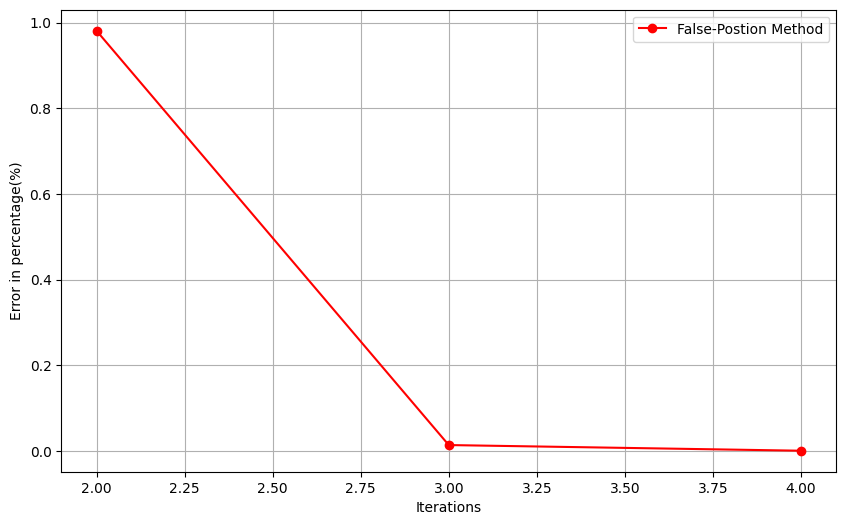

In [9]:
plt.figure(figsize=(10,6))
x=[]
y=[]
for i in range(len(results)):
    x.append(i+1)
    y.append(results[i]['ea(%)'])
    
    
plt.plot(x,y,color='red',label="False-Postion Method",marker='o')
plt.xlabel("Iterations")
plt.ylabel("Error in percentage(%)")
plt.legend()
plt.grid()
plt.show()